Using TensorFlow backend.


Epoch 1/400
0s - loss: 55623.8792
Epoch 2/400
0s - loss: 35347.5994
Epoch 3/400
0s - loss: 22857.0630
Epoch 4/400
0s - loss: 12293.9025
Epoch 5/400
0s - loss: 5315.2149
Epoch 6/400
0s - loss: 2080.1906
Epoch 7/400
0s - loss: 1236.8478
Epoch 8/400
0s - loss: 1088.2621
Epoch 9/400
0s - loss: 1073.9377
Epoch 10/400
0s - loss: 1062.8038
Epoch 11/400
0s - loss: 1064.8570
Epoch 12/400
0s - loss: 1063.3760
Epoch 13/400
0s - loss: 1059.3768
Epoch 14/400
0s - loss: 1060.3715
Epoch 15/400
0s - loss: 1060.7648
Epoch 16/400
0s - loss: 1067.4994
Epoch 17/400
0s - loss: 1047.7552
Epoch 18/400
0s - loss: 1051.5063
Epoch 19/400
0s - loss: 1062.9432
Epoch 20/400
0s - loss: 1051.4585
Epoch 21/400
0s - loss: 1056.3347
Epoch 22/400
0s - loss: 1056.0229
Epoch 23/400
0s - loss: 1055.1471
Epoch 24/400
0s - loss: 1052.2534
Epoch 25/400
0s - loss: 1025.0761
Epoch 26/400
0s - loss: 1043.5413
Epoch 27/400
0s - loss: 1048.7670
Epoch 28/400
0s - loss: 1048.3306
Epoch 29/400
0s - loss: 1026.9812
Epoch 30/400
0s - l

0s - loss: 588.0773
Epoch 246/400
0s - loss: 529.6766
Epoch 247/400
0s - loss: 540.2113
Epoch 248/400
0s - loss: 554.0670
Epoch 249/400
0s - loss: 529.4034
Epoch 250/400
0s - loss: 549.3329
Epoch 251/400
0s - loss: 536.0454
Epoch 252/400
0s - loss: 531.4345
Epoch 253/400
0s - loss: 531.8824
Epoch 254/400
0s - loss: 542.2549
Epoch 255/400
0s - loss: 564.6547
Epoch 256/400
0s - loss: 540.0460
Epoch 257/400
0s - loss: 511.7384
Epoch 258/400
0s - loss: 542.1164
Epoch 259/400
0s - loss: 530.9043
Epoch 260/400
0s - loss: 516.5163
Epoch 261/400
0s - loss: 536.7289
Epoch 262/400
0s - loss: 511.3073
Epoch 263/400
0s - loss: 535.0508
Epoch 264/400
0s - loss: 527.7605
Epoch 265/400
0s - loss: 556.4120
Epoch 266/400
0s - loss: 573.4250
Epoch 267/400
0s - loss: 537.8913
Epoch 268/400
0s - loss: 565.3870
Epoch 269/400
0s - loss: 512.2231
Epoch 270/400
0s - loss: 523.2373
Epoch 271/400
0s - loss: 559.2021
Epoch 272/400
0s - loss: 530.4469
Epoch 273/400
0s - loss: 527.7814
Epoch 274/400
0s - loss: 560

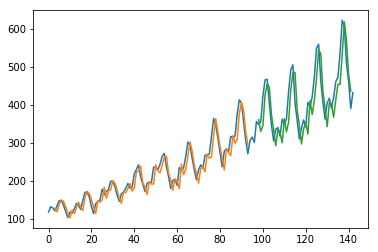

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()